# **Applied Ai #8 Computer Vision Lab Session**

# Welcome To Black Pink marketing Team

As an AI engineer in the team, you're faced with an urgent challenge. Carla, the head of marketing and responsible for all public relations activities, approaches you with a critical issue. With only two days left before a major concert, a mistake has been discovered on the promotional posters intended for display at the venue, leaving the team without usable content.

Carla, realizing the gravity of the situation, remembers a solution involving AI generated content and quickly seeks your expertise.

**Carla**: "Hey, we have an emergency!!"

**You**: "Hi Carla, what's going on?"

**Carla**: "The posters for the concert in two days have an issue. I recall reading that AI can generate images. Is it possible for you to create a new poster?"

**You**: "Absolutely, Carla. This is exactly what I've been preparing for! Let me use Stable Diffusion to generate a few options and I'll show you the results."

**Carla**: "Thanks!!"

# What is Stable Diffusion ?

Stable Diffusion is a type of generative AI that excels at creating unique, photorealistic images, animations, or videos based on text and image prompts. It harnesses diffusion technology to work within a framework called latent space, which helps streamline the creation process. This efficiency means that you don't need super powerful hardware to run it; a regular desktop or laptop with a GPU will do just fine. Additionally, Stable Diffusion is quite flexible—it can be fine-tuned to meet specific creative needs with just a handful of images through transfer learning. This makes it a versatile tool for anyone looking to bring their visual ideas to life.

# Part One: Create an example Black Pink Marketing content for Carla

To assist Carla with the urgent need for new promotional materials for the upcoming concert, follow these steps to create three example images. Adjust the code below by filling in the missing parts. Experiment with different parameters and consider using negative prompts to refine the results. Aim to produce the best possible outputs that capture the essence of Black Pink's branding.


In [ ]:
!pip install --quiet --upgrade diffusers transformers accelerate mediapy

In [ ]:
!pip install torch torchvision --upgrade

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

"""

Choose a Stable diffusion model that can create the best output for black pink and complete the following code.

"""

# Load the model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to(device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Prompt:	Black Pink concert promotional poster
Seed:	3465862198581989752


,,

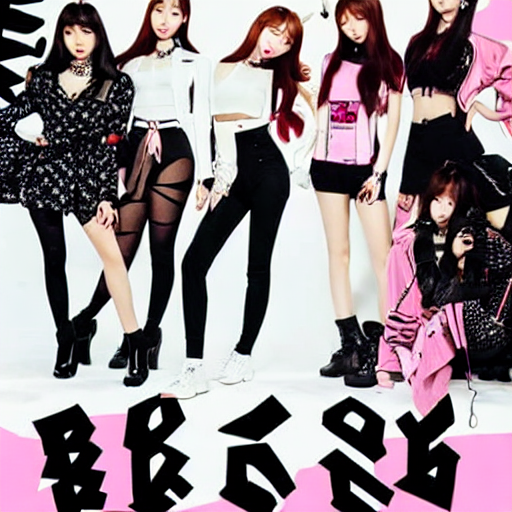
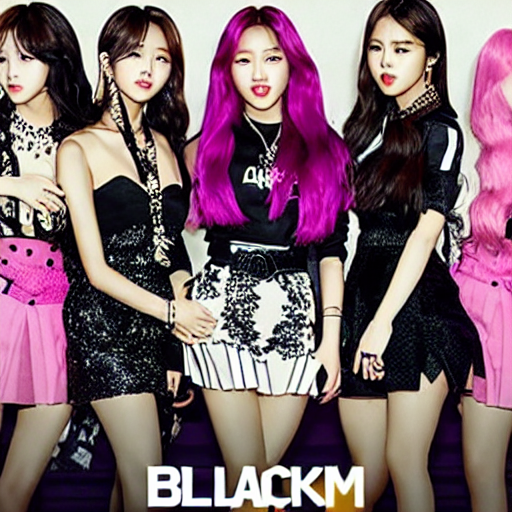
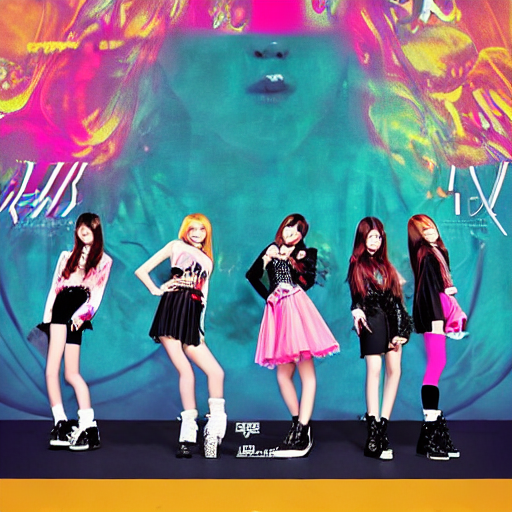

In [ ]:
"""
  Complete the following code for defining a pipe for creating images for Black Pink concert.
  Add proper inputs to pipe function.
 Parameters:
- prompt (str): Description of the desired image output.
- height (int): Desired height for the image (default is 512).
- width (int): Desired width for the image (must be the same as height for square images).
- prior_num_inference_steps (int, optional): Number of inference steps using the prior model.
- prior_guidance_scale (float): Scale for guidance in the prior model, affecting image specificity.
- num_inference_steps (int): Number of inference steps for generating the image.
- decoder_guidance_scale (float): Scale for guidance in the decoder, affecting image fidelity.
- negative_prompt (str, optional): Description of undesired elements in the image.
- num_images_per_prompt (int): Number of images to generate per prompt.
- generator (torch.Generator): Random number generator for image generation, specifying device and seed.
"""

import random
import sys
import mediapy as media

seed = random.randint(0, sys.maxsize)
torch.manual_seed(seed)

prompt = "Black Pink concert promotional poster"
height = 512
width = 512
prior_num_inference_steps = 900
prior_guidance_scale = 0.1
num_inference_steps = 900
decoder_guidance_scale = 0.1
negative_prompt = "No text"
num_images_per_prompt = 3
generator = torch.Generator(device=device)

images = pipe(
    prompt=prompt,
    height=height,
    width=width,
    prior_num_inference_steps=prior_num_inference_steps,
    prior_guidance_scale=prior_guidance_scale,
    num_inference_steps=num_inference_steps,
    decoder_guidance_scale=decoder_guidance_scale,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_images_per_prompt,
    generator=generator
).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")

# The conversation continues

**Carla**: That didn't turn out quite how I imagined, to be honest.

**You**: It's likely because we're using a general model rather than a stable diffusion model tailored to our needs.

**Carla**: What can we do to create a model that fits our requirements better?

**You**: Creating a stable diffusion model from scratch is quite complex and time consuming. However, we can finetune this existing model to better suit our needs.

**Carla**: Fine-tune it? How does that work?

**You**: Essentially, we'll refine the model by training it further with specific data. For us, that means using the Blackpink images we discussed earlier. We'll train the model to associate these images with unique identifiers, in our case, the term "Black Pink."

**Carla**: Amazing! Let's get started on that.

# How To Finetune A Stable Diffusion Model ?


Large models such as Stable Diffusion are generally trained on vast arrays of text-image pairs, giving them broad capabilities but often falling short when it comes to handling niche or specific topics. For example, they might struggle to create lifelike, contextually accurate depictions of Blackpink performing at a concert hall.

To tailor Stable Diffusion for more specialized applications, we start with the base model and selectively retrain certain aspects to better recognize and render specific subjects. This process involves using a curated set of reference images that highlight the unique characteristics we want the model to learn.

For fine-tuning our model to achieve these goals, we typically employ the following methods:

1. **Dreambooth**: This technique personalizes the model to generate images of specific subjects or styles by training it with a small number of representative images.
2. **Textual Inversion**: This involves teaching the model new concepts or specific descriptors using a limited set of examples, allowing it to understand and reproduce these concepts under various prompts.
3. **LORA (Low-Rank Adaptation)**: LORA adapts large models by introducing minimal changes to the existing model architecture, focusing on enhancing its ability to apply learned knowledge in new, specific ways.


So in this notebook we are going to deep dive to **Dreambooth**


In [ ]:
!git clone https://github.com/huggingface/diffusers
%cd /content/diffusers
!pip install --quiet .

fatal: destination path 'diffusers' already exists and is not an empty directory.
/content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# **What is the Diffusers Library?**
The Diffusers library is a Python-based toolkit specifically focused on managing and implementing diffusion models. Diffusion models operate by starting with a pattern of random noise and progressively refining this noise into a detailed and structured output through multiple steps.



In [ ]:
%cd /content/diffusers/examples/dreambooth
!pip install --quiet -r requirements.txt
!pip install --quiet xformers
!pip install --quiet bitsandbytes
!pip install --quiet transformers gradio ftfy accelerate

/content/diffusers/examples/dreambooth


In [ ]:
import os
%cd /content

if os.path.exists("/content/blackpink"):
    print("Removing existing custom_dataset folder")
    !rm -rf /content/blackpink

print("Creating new black_pink_dataset folder")
!mkdir /content/blackpink
!mkdir /content/blackpink/class
!mkdir /content/blackpink/instance

print('Custom Dataset folder is created: /content/blackpink')

/content
Removing existing custom_dataset folder
Creating new black_pink_dataset folder
Custom Dataset folder is created: /content/blackpink


# Why **`resize_and_crop_images`** ?
Before fine-tuning a model like Stable Diffusion, it's critical to resize and crop images to ensure they meet the model's specific input size requirements. This step helps maintain a consistent dimension across all inputs, which is necessary for the structured processing of neural networks. Resizing and cropping also prevent image distortion by keeping the aspect ratio intact, focusing the model's attention on the central features of an image. Additionally, working with uniformly sized images streamlines the computational process, enhancing the efficiency of training and helping the model perform optimally without running into memory or processing bottlenecks.

In [ ]:
from PIL import Image
import os
import IPython.display as display
import matplotlib.pyplot as plt

def resize_and_crop_images(folder_path, target_size=512):
    """
    Resize the images in a folder to have a smaller edge of the specified target size and display them.

    Parameters:
    - folder_path (str): Path to the folder containing the images.
    - target_size (int): Desired size for the smaller edge (default is 512).
    """
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is an image
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # Open the image
            image = Image.open(file_path)

            # Get the original width and height
            width, height = image.size

            # Calculate the new size while maintaining the aspect ratio
            if width <= height:
                new_width = target_size
                new_height = int(height * (target_size / width))
            else:
                new_width = int(width * (target_size / height))
                new_height = target_size

            # Resize the image
            resized_image = image.resize((new_width, new_height))

            left = (new_width - target_size) // 2
            top = (new_height - target_size) // 2
            right = (new_width + target_size) // 2
            bottom = (new_height + target_size) // 2

            # Perform the center crop
            cropped_image = resized_image.crop((left, top, right, bottom))
            cropped_image.save(file_path)

def show_images_in_one_row(folder_path, target_size=256):
    images = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            img = Image.open(file_path)
            img = img.resize((target_size, int(target_size * img.size[1] / img.size[0])))
            images.append(img)

    # Display images in one row
    fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 3, 3))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()



# Class Images and Instance Images
The **DreamBooth** method utilizes two categories of images as inputs:

**Class Images:** These images should represent a broader category such as an object type (e.g., dogs, people) or a style (e.g., painting, cartoon, illustration). Typically, 100 to 200 class images are recommended to help the model effectively learn and adapt to the domain of the chosen object or style category.

**Instance Images:** These images are more specific and focus on the exact object or style you want to model. For objects, you should include 4-5 images captured from different angles and settings to provide a rounded representation of the subject. For styles, around 20-30 images are recommended to ensure the model can understand and reproduce the style's distinctive features accurately.

**Optimization of Class Images:** Class images are technically optional. The model is capable of generating them if provided with a class prompt at the start of training. This simplifies the process as you can either upload your selected images to the class images folder or let the model generate what it needs if the provided images are insufficient.

**Uploading and Processing:** Choose an object or style and collect some high-resolution images. Upload these images to the respective 'instance images' folder. If you have class images, upload them as well. To prepare the images for training, run the preprocessing cells to resize and crop the images to the required dimensions.

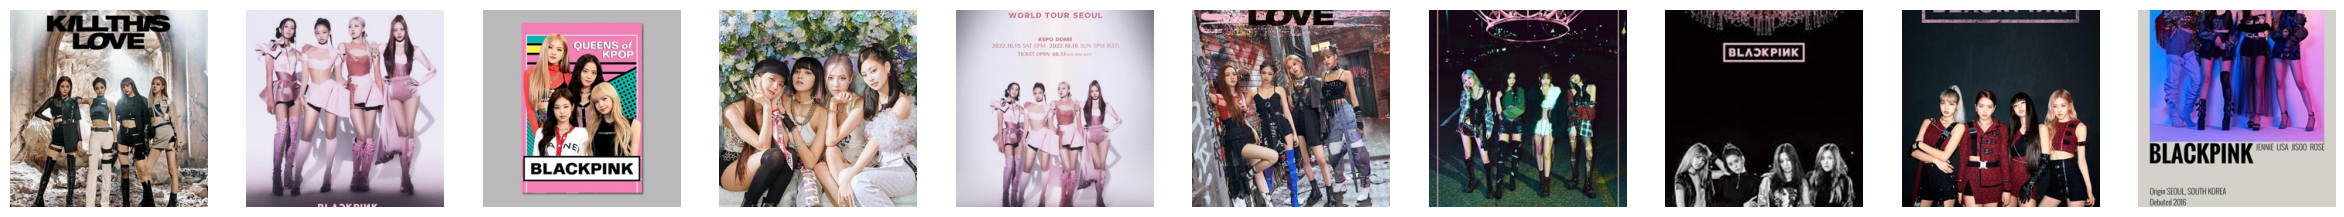

In [ ]:
# Class Images
folder_path = '/content/blackpink/class'
if len(os.listdir(folder_path)):
  resize_and_crop_images(folder_path)
  show_images_in_one_row(folder_path)

# Instance Images
folder_path = '/content/blackpink/instance'
resize_and_crop_images(folder_path)
show_images_in_one_row(folder_path)

In [ ]:
if os.path.exists("/content/outputs"):
    print("Removing existing outputs folder")
    !rm -rf /content/outputs

print("Creating new outputs folder")
!mkdir /content/outputs

print('Output folder is created: /content/outputs')


Removing existing outputs folder
Creating new outputs folder
Output folder is created: /content/outputs


# **Here are the Most of the parameters to finetune the Stable diffusion model with Deambooth**

# **Optimize Memory and Speed of Training:**

revision, variant, and mixed_precision: **bold text** Set to "fp16" for half precision, which speeds up operations and uses less memory.

**checkpoints_total_limit:** Limits the number of checkpoint files saved, important when storage space is limited.

**gradient_accumulation_steps:** Recommended to set at 1 for quicker training.
gradient_checkpointing: Saves memory by storing only crucial gradients when storage is limited.

**lr_warmup_steps:** Often set to 0 to reduce training time.

**enable_xformers_memory_efficient_attention:** Enhances memory efficiency in the model’s attention layers.

**set_grads_to_none:** Further optimizes memory by setting gradient values to None instead of zero after use.

**pre_compute_text_embeddings:** Saves memory by computing text embeddings in advance, though it might not always be advisable.

**use_8bit_adam:** Activates a memory-efficient version of the Adam optimizer, which uses 8-bit precision.

# **For Better Results:**

**pretrained_model_name_or_path:** Indicates the starting diffusion model, such as Stable Diffusion v1.5 or v2.0.

**with_prior_preservation:** Adds a preservation loss to training, helpful for avoiding overfitting, especially with detailed features like faces.

**train_text_encoder:** Suggested to train the text encoder together with the diffusion model to better match text prompts with images.

**snr_gamma:** Adjusts the signal-to-noise ratio in the loss calculation; a value of 5.0 is typically recommended.

# **Prompts and Folders:**

**instance_data_dir: **Folder where instance images are stored.

**class_data_dir:** Folder for class images.

**instance_prompt:** Should be a simple description that includes both the class name and a unique identifier.

**class_prompt:** A basic description that includes the class name.

**output_dir:** Specifies the directory for storing output images and checkpoints.

**validation_prompt:** Used for generating images to validate the model's learning; should mirror the instance prompt.

# **Training Hyperparameters:**

**num_class_images:** Sets the number of class images generated before training starts.

**resolution:** Defines the resolution of input images, generally recommended to be 512 pixels.

**center_crop:** If used, crops images centrally before processing; not necessary if images are already preprocessed.

**train_batch_size:** Sets the number of images processed in one batch on each device.

**sample_batch_size:** Determines the batch size for generating sample images during training.

**max_train_steps:** Puts a cap on the total number of training steps, adjusted based on the specific training objectives.

**checkpointing_steps:** Determines how often to perform validations and save checkpoints.

**learning_rate:** Typically starts at 5e-6, but might be lowered to 2e-6 or 1e-6 based on training requirements.

**lr_scheduler:** Set to "constant" to keep the learning rate steady throughout training.

**num_validation_images:** Sets how many images to generate for each validation session.

**validation_steps:** Specifies the frequency of validation sessions in terms of training steps.

In [ ]:
torch.cuda.empty_cache()

%cd /content/diffusers/examples/dreambooth

"""
Complete the following code with proper inputs, to run the train_dreambooth.py file. Use the parameters provided above. You can add input parameters as "--
"""

!python train_dreambooth.py \
--pretrained_model_name_or_path 'runwayml/stable-diffusion-v1-5' \
--variant 'fp16' \
--mixed_precision 'fp16' \
--checkpoints_total_limit 5 \
--gradient_accumulation_steps 1 \
--gradient_checkpointing \
--lr_warmup_steps 0 \
--enable_xformers_memory_efficient_attention \
--use_8bit_adam \
--with_prior_preservation \
--train_text_encoder \
--instance_data_dir '/content/blackpink/instance' \
--class_data_dir '/content/blackpink/class' \
--instance_prompt 'Black Pink concert instance' \
--class_prompt 'Black Pink concert' \
--output_dir '/content/outputs' \
--num_class_images 10 \
--resolution 256 \
--train_batch_size 1 \
--sample_batch_size 1 \
--max_train_steps 100 \
--checkpointing_steps 100 \
--learning_rate 5e-6 \
--lr_scheduler 'constant'

/content/diffusers/examples/dreambooth
2024-05-01 11:04:00.276160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 11:04:00.276218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 11:04:00.277607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 11:04:01.482603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
05/01/2024 11:04:02 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'requires_safety_checker', 'image_

In [ ]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch
import os

trained_model_path = '/content/outputs/checkpoint-100'

unet = UNet2DConditionModel.from_pretrained(trained_model_path + '/unet')
text_encoder = CLIPTextModel.from_pretrained(trained_model_path + '/text_encoder')

pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", unet=unet,
    text_encoder=text_encoder, dtype=torch.float16,
).to("cuda")

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# **Gradio**

**Carla:** This is awesome, I love the results! I had no idea that creating our own specific stable diffusion model could be this easy and time-efficient. You've really saved the day.

**You:** You're welcome, Carla!

**Carla:** Now I'd like to use this tool to create more images, but I don’t have any coding experience and no time to learn it. Is there an interface I can use to operate this fine-tuned stable diffusion model?

**You:** Absolutely, Carla. I can set up and run the model for you, and I’ll provide you with an interface called Gradio. It's user-friendly and will allow you to create images simply by entering prompts.

**Carla:** Perfect, thanks!

Gradio is a powerful yet user-friendly library that allows developers to quickly build and share web interfaces for their machine learning models. Ideal for demonstrating, testing, and sharing models, Gradio supports a variety of input and output options, integrates seamlessly with popular ML frameworks, and allows easy sharing of applications through unique URLs. With its intuitive design, Gradio simplifies the process of making machine learning models accessible to a wider audience, enabling both experts and novices to interact with and evaluate model performances effortlessly.

**To explore Gradio and see how it works, run the script below. Experiment with different parameters and prompts to understand their impact on the performance and quality of the outputs. This is a great way to see firsthand how adjustments to the inputs can alter the results.**

In [ ]:
import gradio as gr

def inference(prompt, num_samples, negative_prompt, guidance_scale,
              num_inference_steps, height, width):
    all_images = []
    images = pipeline(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale
    ).images
    all_images.extend(images)
    return all_images

with gr.Blocks() as demo:
    gr.HTML("<h2 style=\"font-size: 2em; font-weight: bold\" align=\"center\">Stable Diffusion Dreambooth - Run Concept</h2>")
    with gr.Row():
        with gr.Column():
            prompt = gr.Textbox(label="Prompt")
            negative_prompt = gr.Textbox(label="Negative Prompt")
            samples = gr.Slider(label="Samples", value=1, maximum=12)
            guidance_scale = gr.Slider(label="Guidance Scale", value=7.5, maximum=30)
            num_inference_steps = gr.Slider(label="Inference Steps", value=50, maximum=500)
            height = gr.Slider(label="Height", value=512)
            width = gr.Slider(label="Width", value=512)
            run = gr.Button(value="Run")
        with gr.Column():
            gallery = gr.Gallery(show_label=False)

    run.click(inference, inputs=[prompt, samples, negative_prompt, guidance_scale, num_inference_steps, height, width], outputs=gallery)
    gr.Examples([["a photo of sks dog riding a bicycle", 1, "", 7.5, 150, 512, 512]], [prompt, samples, negative_prompt, guidance_scale, num_inference_steps, height, width], gallery, inference, cache_examples=False)

demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d1a0b6758467a27a56.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Congratulations**! Please save the notebook with all cell outputs included and submit your homework. Here are the criteria for successful completion:

- Finish all the coding sections.
- Execute the Stable Diffusion code to generate images, ideally resembling blank pink themes.
- Fill in the DreamBooth parameters correctly to fine-tune the model.
- Use the fine-tuned Stable Diffusion model to generate images of a Blackpink concert.
- Ensure to save and submit the notebook with all cell outputs visible.